<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#5.-오차역전파법" data-toc-modified-id="5.-오차역전파법-1">5. 오차역전파법</a></span><ul class="toc-item"><li><span><a href="#5.1-계산-그래프" data-toc-modified-id="5.1-계산-그래프-1.1">5.1 계산 그래프</a></span><ul class="toc-item"><li><span><a href="#[계산-그래프로-풀다]" data-toc-modified-id="[계산-그래프로-풀다]-1.1.1">[계산 그래프로 풀다]</a></span></li><li><span><a href="#[국소적-계산]" data-toc-modified-id="[국소적-계산]-1.1.2">[국소적 계산]</a></span></li><li><span><a href="#[왜-계산-그래프로-푸는가?]" data-toc-modified-id="[왜-계산-그래프로-푸는가?]-1.1.3">[왜 계산 그래프로 푸는가?]</a></span></li></ul></li><li><span><a href="#5.2-연쇄법칙" data-toc-modified-id="5.2-연쇄법칙-1.2">5.2 연쇄법칙</a></span><ul class="toc-item"><li><span><a href="#[계산-그래프의-역전파]" data-toc-modified-id="[계산-그래프의-역전파]-1.2.1">[계산 그래프의 역전파]</a></span></li><li><span><a href="#[연쇄법칙이란?]" data-toc-modified-id="[연쇄법칙이란?]-1.2.2">[연쇄법칙이란?]</a></span></li><li><span><a href="#[연쇄법칙과-계산-그래프]" data-toc-modified-id="[연쇄법칙과-계산-그래프]-1.2.3">[연쇄법칙과 계산 그래프]</a></span></li></ul></li><li><span><a href="#5.3-역전파" data-toc-modified-id="5.3-역전파-1.3">5.3 역전파</a></span><ul class="toc-item"><li><span><a href="#[덧셈-노드의-역전파]" data-toc-modified-id="[덧셈-노드의-역전파]-1.3.1">[덧셈 노드의 역전파]</a></span></li><li><span><a href="#[곱셈-노드의-역전파]" data-toc-modified-id="[곱셈-노드의-역전파]-1.3.2">[곱셈 노드의 역전파]</a></span></li><li><span><a href="#[사과-쇼핑의-예]" data-toc-modified-id="[사과-쇼핑의-예]-1.3.3">[사과 쇼핑의 예]</a></span></li></ul></li><li><span><a href="#5.4-단순한-계층-구현하기" data-toc-modified-id="5.4-단순한-계층-구현하기-1.4">5.4 단순한 계층 구현하기</a></span><ul class="toc-item"><li><span><a href="#[곱셈-계층]" data-toc-modified-id="[곱셈-계층]-1.4.1">[곱셈 계층]</a></span></li><li><span><a href="#[덧셈-계층]" data-toc-modified-id="[덧셈-계층]-1.4.2">[덧셈 계층]</a></span></li></ul></li><li><span><a href="#5.5-활성화-함수-계층-구현하기" data-toc-modified-id="5.5-활성화-함수-계층-구현하기-1.5">5.5 활성화 함수 계층 구현하기</a></span><ul class="toc-item"><li><span><a href="#[ReLU-계층]" data-toc-modified-id="[ReLU-계층]-1.5.1">[ReLU 계층]</a></span></li><li><span><a href="#[Sigmoid-계층]" data-toc-modified-id="[Sigmoid-계층]-1.5.2">[Sigmoid 계층]</a></span><ul class="toc-item"><li><span><a href="#&lt;&lt;Sigmoid-역전파-흐름&gt;&gt;" data-toc-modified-id="<<Sigmoid-역전파-흐름>>-1.5.2.1">&lt;&lt;Sigmoid 역전파 흐름&gt;&gt;</a></span></li><li><span><a href="#&lt;&lt;Sigmoid-계층의-계산-그래프-간소화&gt;&gt;" data-toc-modified-id="<<Sigmoid-계층의-계산-그래프-간소화>>-1.5.2.2">&lt;&lt;Sigmoid 계층의 계산 그래프 간소화&gt;&gt;</a></span></li></ul></li></ul></li><li><span><a href="#5.6-Affine/Softmax-계층-구현하기" data-toc-modified-id="5.6-Affine/Softmax-계층-구현하기-1.6">5.6 Affine/Softmax 계층 구현하기</a></span><ul class="toc-item"><li><span><a href="#[Affine-계층]" data-toc-modified-id="[Affine-계층]-1.6.1">[Affine 계층]</a></span></li><li><span><a href="#[배치용-Affine-계층]" data-toc-modified-id="[배치용-Affine-계층]-1.6.2">[배치용 Affine 계층]</a></span></li><li><span><a href="#[Softmax-with-Loss-계층]" data-toc-modified-id="[Softmax-with-Loss-계층]-1.6.3">[Softmax-with-Loss 계층]</a></span></li></ul></li><li><span><a href="#5.7-오차역전파법-구현하기" data-toc-modified-id="5.7-오차역전파법-구현하기-1.7">5.7 오차역전파법 구현하기</a></span><ul class="toc-item"><li><span><a href="#[신경망-학습의-전체-순서]" data-toc-modified-id="[신경망-학습의-전체-순서]-1.7.1">[신경망 학습의 전체 순서]</a></span></li><li><span><a href="#[오차역전파법을-적용한-신경망-구현하기]" data-toc-modified-id="[오차역전파법을-적용한-신경망-구현하기]-1.7.2">[오차역전파법을 적용한 신경망 구현하기]</a></span></li><li><span><a href="#[오차역전파법으로-구한-기울기-검증하기]" data-toc-modified-id="[오차역전파법으로-구한-기울기-검증하기]-1.7.3">[오차역전파법으로 구한 기울기 검증하기]</a></span></li><li><span><a href="#[오차역전파법을-사용한-학습-구현하기]" data-toc-modified-id="[오차역전파법을-사용한-학습-구현하기]-1.7.4">[오차역전파법을 사용한 학습 구현하기]</a></span></li></ul></li></ul></li></ul></div>

# 5. 오차역전파법

- 앞 장에서는 신경망의 가중치 매개변수의 기울기(정확히는 가중치 매개변수에 대한 손실함수의 기울기)는 수치 미분을 사용해 구했으나, <br>
   수치 미분은 단순하고 구현하기도 쉽지만 계산 시간이 오래 걸리는 단점이 있음
- **오차역전파법(backpropagation, backward propagation of errors)**은 가중치 매개변수에 대한 손실함수의 기울기를 효율적으로 계산하기 위한 방법
- 오차역전파법을 이해하는 방법은 수식을 통한 방법 또는 계산 그래프를 이용한 방법이 있음(이번 장에서는 계산 그래프를 사용해 시각적으로 이해)

## 5.1 계산 그래프

- **계산 그래프(Computational Graph)**는 계산 과정을 그래프로 나타낸 것
- 그래프는 그래프 자료구조로, 복수의 **노드(Node)**와 **에지(Edge)**로 표현(노드 사이의 직선을 '에지'라고 함)

### [계산 그래프로 풀다]

- 계산 그래프는 계산 과정을 노드와 화살표로 표현함
- 노드는 원으로 표기하고, 원 안에 연산 내용을 기술
- 계산 결과를 화살표 위에 적어서 각 노드의 계산 결과가 왼쪽에서 오른쪽으로 전해짐
- 사과 지불 금액 계산 그래프 [그림 5.1]

>![사과 계산 그래프 순전파](./images/0001.jpeg)

- 사과와 귤의 지불금액 계산 그래프 [그림 5.2]

>![사과와 귤 계산 그래프 순전파](./images/0002.jpeg)

- **계산 그래프를 이용한 문제풀이 흐름**

> 1. 계산 그래프를 구성한다.
> 1. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행한다.

- 계산을 왼쪽에서 오른쪽으로 진행하는 단계를 **순전파(Forward Propagation)** 라고 함
- 반대방향(오른쪽에서 왼쪽)으로 전파가 진행하는 단계를 **역전파(Backward Propagation)** 라고 함

### [국소적 계산]

- 계산 그래프의 특징은 **"국소적 계산"을 전파함으로써 최종 결과를 얻는다**는 점에 있음
- 국소적이란 **"자신과 직접 관계된 작은 범위"**라는 뜻
- 국소적 계산은 결국 전체에서 어떤 일이 벌어지든 상관 없이 자신과 관계된 정보만으로 다음 결과(그 후의 결과)를 출력할 수 있음. <br>
   각 노드는 자신과 관련된 계산 외에는 아무것도 신경 쓸 게 없음

### [왜 계산 그래프로 푸는가?]

1. 국소적 계산을 통해 전체가 아무리 복잡해도 각 노드에서는 단순한 계산에 집중하여 문제를 단순화할 수 있음
1. 계산 그래프는 중간 계산 결과를 모두 보관할 수 있음
1. 역전파를 통해 "미분"을 효율적으로 계산할 수 있음

>예로, **"사과 가격이 오르면 최종 금액에 어떤 영향을 끼치는지"**를 알고 싶다면, <br>
이 문제는 **"사과 가격에 대한 지불 금액의 미분"**을 구하는 문제에 해당함. <br>
기호로 나타내면 사과 값을 $x$, 지불 금액을 $L$ 이라 했을 때, $\frac{\delta L}{\delta x}$을 구하는 것. <br>
**이 미분 값은 사과 값이 "아주 조금" 올랐을 때 지불 금액이 얼마나 증가하느냐를 표시한 것 이며,** <br>
**"사과 가격에 대한 지불 금액의 미분" 같은 값은 계산 그래프에서 역전파를 하면 구할 수 있음**

- **역전파에 의한 미분 값의 전달** [그림 5.3]

>![역전파에 의한 미분 값의 전달](./images/0003.jpg)
> - 역전파는 순전파와는 반대 방향의 화살표(굵은 선)로 그리며, 국소적 미분 값을 전달하고 그 미분 값은 화살표의 아래에 적음
> - 위의 그림에서, "사과 가격에 대한 지불 금액의 미분" 값은 2.2라 할 수 있으며, <br>
     사과 값이 아주 조금 오르면 최종 금액은 그 아주 작은 값의 2.2배 만큼 오른다는 뜻
> - 소비세에 대한 지불 금액의 미분이나, 사과 개수에 대한 지불 금액의 미분도 구할 수 있으며, <br>
     이러한 계산 시 중간까지 구한 미분 결과를 공유할 수 있어서 다수의 미분을 효율적으로 계산할 수 있음

## 5.2 연쇄법칙

- 국소적 미분을 전달하는 원리는 **"연쇄법칙(Chain Rule)"**에 따른 것임
- **연쇄법칙은 계산 그래프의 역전파와 같음**

### [계산 그래프의 역전파]

- **$\normalsize y = f(x)$ 계산 그래프의 역전파** [그림 5.4]

>![계산 그래프의 역전파](./images/0004.jpg)
> - 역전파의 계산 절차는 신호 $E$에 노드의 국소적 미분($\large \frac{\delta y}{\delta x}$)을 곱한 후 다음 노드로 전달 함
> - 국소적 미분은 순전파 때의 y = f(x) 계산의 미분을 구한다는 것이며, 이는 x에 대한 y의 미분($\large \frac{\delta y}{\delta x}$)을 구한다는 뜻
> - 가령, $y = f(x) = x^2$ 이라면, $\large \frac{\delta y}{\delta x}$는 $2x$ 가 되며, 이 국소적인 미분을 상류에서 전달된 값($E$)에 곱해서 앞쪽 노드로 전달 함
> - 이러한 방식을 따르면 목표로 하는 미분 값을 효율적으로 구할 수 있다는 것이 이 전파의 핵심임

### [연쇄법칙이란?]

- 합성 함수란 여러 함수로 구성된 함수로, $\normalsize z = (x + y)^2$ 은 다음 두 개의 식으로 구성됨

> $\large z = t^2 \\
     \large t = x + y$ &nbsp;&nbsp;&nbsp;&nbsp; --- \[식 5.1]

- 연쇄법칙은 합성 함수의 미분에 대한 성질이며, <br>
   **연쇄법칙의 정의**는 **"합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다."** <br><br>

- $\Large \frac{\delta z}{\delta x}$($x$에 대한 $z$의 미분)은  $\Large \frac{\delta z}{\delta t}$($t$에 대한 $z$의 미분)과 $\Large \frac{\delta t}{\delta x}$($x$에 대한 $t$의 미분)의 곱으로 나타낼 수 있음 ---- \[식 5.2]

>$$\large \frac{\delta z}{\delta x} = \frac{\delta z}{\delta t} \frac{\delta t}{\delta x}$$ <br>

- 위 식에서 $\delta t$는 분모와 분자에서 서로 지울 수 있음

>$$\large \frac{\delta z}{\delta x} = \frac{\delta z}{\not \delta t} \frac{\not \delta t}{\delta x}$$ <br>

- \[식 5.1]에서 국소적 미분(편미분)을 구하면 아래와 같음 ---- \[식 5.3]

>$$\large \frac{\delta z}{\delta t} = 2t \\
\large \frac{\delta t}{\delta x} = 1$$ <br>
> - $\large \frac{\delta z}{\delta t}$는 $2t$이고, $\large \frac{\delta t}{\delta x}$는 1 이며, 이는 미분 공식에서 해석적으로 구한 결과임

- 최종적으로 구하고 싶은 $\large \frac{\delta z}{\delta x}$는 [식 5.3]에서 구한 두 미분을 곱해서 계산 함 ---- \[식 5.4]

>$$\large \frac{\delta z}{\delta x} = \frac{\delta z}{\delta t} \frac{\delta t}{\delta x} = 2t \cdot 1 = 2(x + y)$$

### [연쇄법칙과 계산 그래프]

- [식 5.4]의 계산 그래프 : 순전파와 반대 방향으로 국소적 미분을 곱하여 전달 [그림 5.5]

>![식 5.4의 계산 그래프](./images/0005.jpg)

- "$**2$" 노드에서의 역전파는 입력이 $\large \frac{\delta z}{\delta z}$이며, 이에 극소적 미분인 $\large \frac{\delta z}{\delta t}$를 곱하고 다음 노드로 넘김 <br>
   (순전파 시에는 입력이 $t$이고 출력이 $z$이므로 이 노드에서 국소적 미분은 $\large \frac{\delta z}{\delta t}$)
- 역전파의 첫 신호인 $\large \frac{\delta z}{\delta z}$의 값은 1
- 맨 왼쪽의 역전파는 연쇄법칙에 따르면, 아래 식이 성립되어 "$x$에 대한 $z$의 미분"이 됨

>$$\large \frac{\delta z}{\delta z} \frac{\delta z}{\delta t} \frac{\delta t}{\delta x} = \frac{\delta z}{\delta t} \frac{\delta t}{\delta x} = \frac{\delta z}{\delta x}$$

- 즉, **역전파가 하는 일은 연쇄법칙의 원리와 같다.**
- [그림 5.5]에 [식 5.3]을 대입한 계산 그래프의 역전파 결과

> ![계산 그래프 역전파 결과](./images/00051.jpg)

## 5.3 역전파

### [덧셈 노드의 역전파]

- $\normalsize z = x + y$의 미분은 다음과 같이 해석적으로 계산할 수 있음 ---- \[식 5.5]

>$$\large \frac{\delta z}{\delta x} = 1 \\
    \large \frac{\delta z}{\delta y} = 1$$

- **덧셈 노드의 역전파**는 $\large \frac{\delta z}{\delta x}$와 $\large \frac{\delta z}{\delta y}$ 모두 1 이이서, **입력 값을 그대로 흘려보냄** [그림 5.6]

>![덧셈 노드의 역전파](./images/0006.jpg)
> - 상류에서 전해진 미분(이 예에서는 $\Large \frac{\delta z}{\delta t}$)에 $\normalsize 1$을 곱하여 하류로 흘림

### [곱셈 노드의 역전파]

- $\normalsize z = x \: y$의 미분은 다음과 같이 해석적으로 계산할 수 있음 ---- [식 5.6]

> $$\large \frac {\delta z}{\delta x} = y \\
       \large \frac {\delta z}{\delta y} = x$$

- 곱셈 노드의 역전파 계산 그래프 [그림 5.7]

> ![곱셈 노드의 역전파](./images/0007.jpg)
> - 곱셈 노드의 역전파는 상류의 값에 순전파 때의 입력 신호들을 "서로 바꾼 값"을 곱해서 하류로 보냄
> - "서로 바꾼 값"이란 순전파 때 $x$ 였다면 역전파에서는 $y$, 순전파 때 $y$ 였다면 역전파에서는 $x$로 바꾼다는 의미
> - 곱셈의 역전파는 순방향 입력 신호의 값이 필요하기 때문에 곱셈 노드를 구현할 때는 순전파의 입력 신호를 지유해야 함

### [사과 쇼핑의 예]

- 사과의 가격, 사과의 개수, 소비세라는 세 변수 각각이 최종 금액에 어떻게 영향을 주는지 문제를 풀고자 함
- 이는 "사과 가격에 대한 지불 금액의 미분", "사과 개수에 대한 지불 금액의 미분", "소비세에 대한 지불 금액의 미분"을 구하는 것임
- 사과 쇼핑의 역전파 예 [그림 5.8]

>![사과 쇼핑 역전파](./images/0008.jpeg)
> - 곱셈 노드의 역전파에서는 상류의 값에 입력 신호를 서로 바꾼 값을 곱해서 하류로 흘림

- 사과와 귤 쇼핑의 역전파 예 [그림 5.9]

>![사과와 귤 쇼핑 역전파](./images/0009.jpeg)

## 5.4 단순한 계층 구현하기

- 신경망을 구성하는 층(계층) 각각을 하나의 클래스로 구현(연산을 담당하는 노드를 클래스로 구현)

### [곱셈 계층]

- 모든 계층은 forward()와 backward()라는 공통의 메서드(인터페이스)를 갖도록 구현. forward()는 순전파, backward()는 역전파

In [1]:
# 곱셈 계층 계산 그래프 구현
class MultiLayer():
    def __init__(self):
        self.x = None   # 역전파에 사용하기 위해, 순전파 때의 입력 값을 유지하기 위한 변수
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self, dout):   # dout은 상류층의 순전파의 미분 값
        dx = dout * self.y    # 상류에서 전달된 값에 x와 y를 바꿔서 곱한다.
        dy = dout * self.x

        return dx, dy

In [2]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MultiLayer()
mul_tax_layer = MultiLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print("price : {:.2f}".format(price))

price : 220.00


In [3]:
# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("dapple, dapple_num, dtax : {:.2f}, {:.2f}, {:.2f}".format(
    dapple, dapple_num, dtax))

dapple, dapple_num, dtax : 2.20, 110.00, 200.00


- [그림 5.8]의 곱셈의 역전파 그래프와 결과가 동일함

### [덧셈 계층]

In [4]:
# 덧셈 계층 계산 그래프 구현
class AddLayer:
    def __init__(self):
        pass      # 덧셈 노드에서는 순전파 때의 입력 값을 유지할 필요 없음(역전파에서 사용하지 않음)

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout * 1     # 상류에서 내려온 미분(dout) 값을 그대로 하류로 흘려 보냄
        dy = dout * 1

        return dx, dy

In [5]:
# 덧셈 계층과 곱셈 계층을 사용한 사과와 귤의 계산 그래프 구현
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층들
mul_apple_layer = MultiLayer()
mul_orange_layer = MultiLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MultiLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)

print("price : {:.0f}".format(price))
print("dapple, dapple_num, dorange, dorange_num, dtax: {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}".format(
    dapple, dapple_num, dorange, dorange_num, dtax))

price : 715
dapple, dapple_num, dorange, dorange_num, dtax: 2.20, 110.00, 3.30, 165.00, 650.00


- 필요한 계층을 만들고 순전파 메서드인 **forward()를 적절한 순서로 호출** (계산 그래프의 순전파 순서 대로 호출)
- **순전파와 반대 순서로 역전파 메서드인 backward()를 호출하면 미분이 계산됨**
- [그림 5.9]의 사과와 귤 쇼핑의 역전파 결과와 동일함

## 5.5 활성화 함수 계층 구현하기

- 신경망을 구성하는 층(계층) 각각을 클래스 하나로 구현

### [ReLU 계층]

- ReLU 수식 ---- \[식 5.7]

> $$\normalsize y = \begin{cases} x \ \ \ \ \ (x > 0) \\ 
    0 \ \ \ \ \ (x \le 0) \end{cases}$$

- $x$에 대한 $y$의 미분 ---- \[식 5.8]

> $$\normalsize \frac{\delta y}{\delta x} = \begin{cases} 1 \ \ \ \ \ (x > 0) \\ 
   0 \ \ \ \ \ (x \le 0) \end{cases}$$
> - [식 5.8]에서와 같이 **순전파 때의 입력인 $x$가 $0$ 보다 크면 역전파는 상류의 값을 그대로 하류로 흘리고 ($1$을 곱해서 하류로 흘리고)**,
> - **순전파 때 $x$가 $0$ 이하이면 역전파 때는 하류에 신호를 보내지 않음 ($0$을 보냄)**

- ReLU 계층의 계산 그래프 [그림 5.10]

> ![ReLU 계층 계산 그래프](./images/0010.jpg)

In [6]:
# ReLU 계층 구현 (forward() 함수와 backward() 함수는 numpy 배열을 인수로 받는 것으로 가정)
class ReLU:
    def __init__(self):
        # True/False로 구성된 numpy 배열로, 순전파의 입력인 x의 원소 값이 0 이하인 인덱스는 True, 그 외의 인덱스는 False
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0  # self.mask가 True인 인덱스의 값을 0으로 변경

        return 0

    def backward(self, dout):
        # 순전파에서 만든 mask를 써서 mask가 True인 곳은 상류에서 전파된 dout을 0으로 변경
        dout[self.mask] = 0

        return dout

In [7]:
import numpy as np

x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

mask = (x <= 0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


### [Sigmoid 계층]

- 시그모이드 함수 식 ---- \[식 5.9]

> $$\normalsize y = \frac{1}{1 + exp(-x)}$$
> - $\normalsize exp(-x)$는 지수함수 $\large e^{-x}$를 의미

- Sigmoid 계층의 계산 그래프(순전파)  ---- \[그림 5.11]

> ![시그모이드 순전파](./images/0011.jpg)
> - "$\normalsize exp$" 노드는 $\normalsize y = exp(-x)$ 계산을 수행하고,
> - "$\normalsize /$" 노드는 $\normalsize y = \large \frac{1}{x}$ 계산을 수행 ($\normalsize x$는 국소적 미분의 입력값을 의미)

#### <<Sigmoid 역전파 흐름>>

- **1단계**

> - $\normalsize y = \frac{1}{\large x}$ 미분 식은, ---- \[식 5.10]
> $$\normalsize \frac{\delta y}{\delta x} = - \frac{1}{x^2}$$ <br>
> $$\normalsize \ \ \ = - y^2$$ <br>
> - $\normalsize y = \frac{1}{\large x}$의 $x$를 시그모이드 출력의 분모 부분으로 생각하면 시그모이드 출력의 미분에 그대로 적용 가능 <br>
> $$\normalsize y = \frac{1}{1 + exp(-x)}$$ <br>
> $$\normalsize \frac{\delta y}{\delta x} = - \frac{1}{(1 + exp(-x))^2}$$ <br>
> $$\normalsize = - \Big(\frac{1}{1 + exp(-x)} \Big)^2$$ <br>
> $$\normalsize = - y^2$$ <br>
> - **"$\normalsize /$" 노드는 상류의 예측값에 $-y^2$(순전파의 출력을 제곱한 후 마이너스를 붙인 값)을 곱해서 하류로 전달** <br><br>
> $$\normalsize - \frac{\delta L}{\delta y} \ y^2$$ <br>

- **2단계**

> - **"$\normalsize +$" 노드는 상류의 값을 여과 없이 하류로 내보냄** (1단계 출력과 동일함)

- **3단계**

> - **"$\normalsize exp$" 노드는 $\normalsize y = exp(-x)$ 연산을 수행** 하며, 그 미분은 다음과 같음 (밑이 $\normalsize e$인 지수 함수의 도함수는 자기 자신) ---- \[식 5.11] <br><br>
> $$\normalsize \frac{\delta y}{\delta x} = exp(-x)$$ <br>
> - "$\normalsize exp$" 노드의 연산 결과는 상류의 예측값에 위의 값을 곱하여 아래와 같이 하류로 전달 <br><br>
>  $$\normalsize - \frac{\delta L}{\delta y} \ y^2 \ exp(-x)$$

- **4단계**

> - **"$\normalsize x$" 노드는 순전파 때의 값을 서로 바꿔 곱함**. 이 예에서는 **-1을 곱 하면 됨** <br><br>
> - 역전파의 최종 출력은,
> $$\normalsize \frac{\delta L}{\delta y} \ y^2 \ exp(-x)$$ <br>
> - 역전파 전체 과정을 포함한 Sigmoid 계층의 계산 그래프(순전파 &역전파) ---- \[그림 5.12] <br>
> ![단순한 시그모이드 역전파](./images/0012.jpg) <br>
> - 위의 식 처럼, **$\large \frac{\delta L}{\delta y} \normalsize y^2 exp(-x)$를 순전파의 입력 $x$와 출력 $y$ 만으로 계산할 수 있으며**, <br>
    **계산 그래프의 중간 과정을 그룹화 하여 아래와 같이 단순한 "sigmoid" 노드 하나로 대체할 수 있음** ---- \[그림 5.13]
> ![단순한 시그모이드 역전파](./images/0013.jpg)
> - \[그림 5.12]와 \[그림 5.13]의 결과는 똑같음. \[그림 5.13]의 간소화 버전이 역전파 과정의 중간 계산들을 생략할 수 있어 더 효율적인 계산이라 말할 수 있음 <br>
> - 노드를 그룹화 하여 sigmoid 계층의 세세한 내용을 노출하지 않고 입력과 출력에만 집중할 수 있다는 것도 중요한 포인트

#### <<Sigmoid 계층의 계산 그래프 간소화>>

- $\large \frac{\delta L}{\delta y} \normalsize y^2 exp(-x)$는 다음처럼 정리해서 쓸 수 있음 ---- \[식 5.12]
> $$\normalsize \frac{\delta L}{\delta y} y^2 exp(-x) = \frac{\delta L}{\delta y} \frac{1}{(1 + exp(-x))^2} exp(-x)$$ <br>
> $$\normalsize = \frac{\delta L}{\delta y} \frac{1}{1 + exp(-x)} \frac{exp(-x)}{1 + exp(-x)}$$ <br>
> $$\normalsize = \frac{\delta L}{\delta y} \ y \ (1 - y)$$ <br>
> - 참고로, $\normalsize (1 - y)$로 축약되는 과정을 역으로 풀면, $\normalsize 1$의 분모와 분자에 동일한 값$\normalsize (1 + exp(-x))$을 곱한 후 분자 끼리 더함 <br><br>
> $$\normalsize (1 - y) = \frac{\not 1 + exp(-x)}{1 + exp(-x)} + \frac{\not -1}{1 + exp(-x)}$$ <br>
> - 결론적으로, **sigmoid 계층의 역전파는 순전파의 출력($\normalsize y$) 만으로 계산할 수 있음**

- **Sigmoid 계층의 계산 그래프 : 순전파의 출력 $\normalsize y$ 만으로 역전파 계산** ---- \[그림 5.14]
> ![Sigmoid 계층의 계산 그래프 최종](./images/0014.jpg)

In [8]:
# Sigmoid 계층 구현하기
class Sigmoid:
    def __init__(self):
        self.out = None     # 역전파 계산을 위한 순전파 출력값을 저장하기 위한 인스턴스 변수

    def forward(self, x):
        # sigmoid 출력 공식을 그대로 구현 (x는 numpy 배열이라는 전제)
        out = 1 / (1 + np.exp(-x))
        self.out = out                     # 역전파 계산을 위해 인스턴스 변수에 저장

        return out

    def backward(self, dout):
        # [식 5.12]와 [그림 5.14]의 역전파 최종 출력 공식
        dx = dout * self.out * (1 - self.out)

        return dx

## 5.6 Affine/Softmax 계층 구현하기

### [Affine 계층]

- 신경망의 순전파에서는 가중치 신호의 총합을 계산하기 때문에 행렬의 내적을 사용함 : np.dot() 메서드 사용
- 행렬의 내적 계산은 대응하는 차원의 원소 수를 일치시키는 게 핵심 ---- \[그림 5.15]
> ![행렬의 내적 대응 차원](./images/0015.jpg)
- 신경망의 순전파 때 수행하는 **행렬의 내적**은 기하학에서는 **어파인 변환(Affine Transformation)** 이라고 함

In [9]:
X = np.random.rand(2)
W = np.random.rand(2, 3)
B = np.random.rand(3)

print(X.shape)
print(W.shape)
print(B.shape)

Y = np.dot(X, W) + B

print(B)

(2,)
(2, 3)
(3,)
[0.17713771 0.85793503 0.3310605 ]


- **Affine 계층의 계산 그래프(순전파)**
> - 행렬의 내적을 계산하는 노드를 "dot"이라 정의
> - Affine 계층 계산 그래프(순전파) : $\matrix Y = np.dot(\matrix X \cdot \matrix W) + \matrix B$의 계산 그래프 (각 변수의 이름 위에 형상도 표기) ---- \[그림 5.16]
> ![Affine 계층 계산 그래프](./images/0016.jpg)
> - $\matrix X, W, B$는 행렬 : "(2, )"은 "1행 2열" 짜리 행렬의 Numpy 표현(열 벡터를 행렬로 표현한 것) 이며, N행 2열의 경우 (N, 2) 처럼 표현됨

- **Affine 계층의 계산 그래프(역전파)**
> - 행렬을 사용한 역전파도 행렬의 원소마다 전개해보면 스칼라값을 사용한 지금까지의 계산 그래프와 같은 순서로 생각할 수 있음 <br>
> - **Affine 계층의 역전파 수식** ---- \[식 5.13] <br><br>
> $$\frac{\delta \matrix L}{\delta \matrix X} = \frac{\delta \matrix L}{\delta \matrix Y} \cdot \matrix W^T$$ <br>
> $$\frac{\delta \matrix L}{\delta \matrix W} = \matrix X^T \cdot \frac{\delta \matrix L}{\delta \matrix Y}$$ <br>
> - ["벡터와 행렬에 대한 미분" 참고 자료 1](http://darkpgmr.tistory.com/141), ["벡터와 행렬에 대한 미분" 참고 자료 2](https://nbviewer.jupyter.org/github/metamath1/ml-simple-works/blob/master/fitting/matrix-derivative.ipynb) <br><br>
> - $\matrix W^T$의 T는 전치행렬을 뜻하며, 전치행렬은 $\matrix W$의 $(i, j)$위치의 원소를 $(j, i)$ 위치로 바꾼 것 ---- \[식 5.14] <br><br>
> $$\matrix W = \begin{bmatrix} W_{11} W_{21} W_{31} \\
        W_{12} W_{22} W_{32} \end{bmatrix}$$ <br>
> $$\matrix W^T = \begin{bmatrix} W_{11} W_{12} \\
        W_{21} W_{22} \\
        W_{31} W_{32} \end{bmatrix}$$ <br>
> - **Affine 계층의 역전파 계산 그래프 (변수는 다차원 배열)** ---- \[그림 5.17]
> ![Affine 계층 역전파 계산 그래프](./images/0017.jpg)
> - **$\matrix X$와 $\large \frac{\delta L}{\delta X}$가 같은 형상이고, $\matrix W$와 $\large \frac{\delta L}{\delta W}$가 같은 형상임** (스칼라 함수인 $L$을 행렬 $\matrix X$와 $\matrix W$의 각 원소 마다 미분하는 형태) ---- \[식 5.15] <br><br>
> $$\large \matrix X = (x_0, x_1, \cdots, x_n)$$ <br>
> $$\large \frac{\delta L}{\delta X} = (\frac{\delta L}{\delta x_0}, \frac{\delta L}{\delta x_1}, \cdots, \frac{\delta L}{\delta x_n})$$ <br>
> - 행렬 내적("dot" 노드)의 역전파는 행렬의 대응하는 차원의 원소 수가 일치하도록 내적을 조립하여 구할 수 있음. <br>
     예를들어, $\large \frac{\delta L}{\delta Y}$의 형상이 $(3, )$이고, $\large \frac{\delta L}{\delta X}$의 형상이 $(2, )$가 되도록 하는 $\matrix W$의 형상 $(3, 2)$를 찾아낼 수 있음 ---- \[그림 5.18]
> ![행렬 내적 조립](./images/0018.jpg)

### [배치용 Affine 계층]



- 배치용 Affine 계층은 데이터 $N$개를 묶어 순전파 하는 경우의 Affine 계층으로, 기존 Affine 계층과 다른 부분은 형상이 $(N, 2)$가 된 것 뿐임 
- **배치용 Affine 계층 계산 그래프** ---- \[그림 5.19]
> ![배치용 Affine 계층 계산 그래프](./images/0019.jpg)
> - 순전파 때의 편향 덧셈은 $\matrix X \cdot \matrix W$에 대한 편향 $\matrix B$가 N개의 데이터 각각에 더해짐. <br>
     결론적으로, 출력에 B의 N 배 만큼의 영향이 있음
> - **역전파 때는 각 데이터의 역전파 값이 편향의 원소에 모여야 함.** <br>
     미분의 정의(입력이 아주 조금 변동될 때 출력의 영향)에 따라 역전파 때는 각 데이터의 미분 값을 모두 더해야 함
> - **편향의 역전파는 그 두 데이터에 대한 미분을 데이터 마다 더해서 구함.** <br>
     numpy.sum( )으로 상류에서 전달된 미분값의 0번째 축(데이터를 단위로 하는 축, axis=0)에 대해서 총합을 구하면 됨

In [10]:
# 편향의 역전파
dY = np.array([[1, 2, 3], [4, 5, 6]])
print(dY)

dB = np.sum(dY, axis=0)
print(dB)

[[1 2 3]
 [4 5 6]]
[5 7 9]


In [11]:
# 배치용 Affine 계층 구현
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        return dx

### [Softmax-with-Loss 계층]

- Softmax 계층과 손실함수인 Cross-Entropy-Error 계층을 포함하여 **"Softmax-with-Loss 계층"** 으로 구현
- 춣력층에서 사용하는 **Softmax 함수는 입력 값을 정규화(출력의 합이 1이 되도록 변형) 하여 출력함(출력 결과는 확률로 사용 가능함)**
- 신경망의 학습에는 Softmax 계층이 필요하지만, 추론할 때는 일반적으로 Softmax 함수를 사용하지 않고 마지막 Affine 계층의 출력을 인식 결과로 이용함
- 신경망에서 정규화 하지 않은 출력 결과(Softmax 바로 전의 Affine 계층의 출력)을 **점수**라고 함

- **간소화한 Softmax-with-Loss 계층 계산 그래프** ---- \[그림 5.20]

> ![Softmax-with-Loss 계층 계산 그래프](./images/fig5-30.png)
> - 3클래스 분류로 가정하고, 이전 계층에서 3개의 입력(점수)을 받음. Softmax 계층의 입력은 $\normalsize (a_1, a_2, a_3)$, 출력은 $\normalsize (y_1, y_2, y_3)$
> - Cross Entropy Error 계층은 Softmax 계층의 출력과 정답 레이블 $\normalsize (t_1, t_2, t_3)$을 입력으로 받고, 손실 $\normalsize L$을 출력
> - Softmax-with-Loss 계층의 **순전파의 출력인 손실함수는** $\normalsize L = - \ (t_1 \log {y_1} + t_2 \log {y_2} + \cdots + t_n \log {y_n})$
> - Softmax 계층의 **역전파는 $\normalsize (y_1 - t_1, y_2 - t_2, y_3 - t_3)$ 이며, 이는 Softmax 계층의 출력과 정답 레이블의 차분과 같음.** <br>
     신경망의 역전파에서는 이 차이인 오차가 앞 계층에 전해지는 것 임
> - 신경망 학습의 목적은 신경망의 출력(Softmax의 출력)이 정답 레이블과 가까워지도록 가중치 매개변수의 값을 조정하는 것이며, <br>
     신경망의 출력과 정답 레이블의 오차를 효율적으로 앞 계층에 전달해야 함. $(y_1 - t_1, y_2 - t_2, y_3 - t_3)$ 라는 결과는 이를 잘 반영하고 있음

In [12]:
# Softmax-with-Loss 계층 구현
class SoftmaWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size

        return dx

- **역전파 구현 시 참고사항**
> - 역전파의 초기값은 가장 오른쪽 역전파의 값으로, $\large \frac{\delta L}{\delta L}$은 $1$ 임
> - "X" 노드의 역전파는 순전파 시의 입력들의 값을 서로 바꿔서 상류의 미분에 곱하고 하류로 전달
> - "+" 노드의 역전파는 상류에서 전해지는 미분을 그대로 출력
> - "log" 노드의 역전파는 다음 식에 따름
> $$\normalsize y = \log x$$ <br>
> $$\normalsize \frac{\delta y}{\delta x} = \frac{1}{x}$$ <br>

## 5.7 오차역전파법 구현하기

### [신경망 학습의 전체 순서]

- 전제 : 신경망에는 적용 가능한 가중치와 편향이 있고, 이 **가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 "학습"이라 함**
- **1단계(미니배치)** : 훈련 데이터 중 일부를 무작위로 가져옴. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실함수 값을 줄이는 것이 목표
- **2단계(기울기 산출)** : 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구함. <br>
     기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시함. **오차역전파법**을 이용하면 느린 수치 미분과 달리 기울기를 효율적이고 빠르게 구할 수 있음
- **3단계(매개변수 갱신)** : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
- **4단계(반복)** : 1~3단계를 반복

### [오차역전파법을 적용한 신경망 구현하기]

- **TwoLayerNet 클래스의 인스턴스 변수**
> - **params** : 딕셔너리 변수로 신경망의 **매개변수($W1, b1, W2, b2$)를 보관**
> - **layers** : 순서가 있는 딕셔너리 변수로, 신경망의 계층을 보관. **각 계층을 순서대로 유지**(OrderedDict 클래스로 객체 생성)
> - **lastLayer** : 신경망의 마지막 계층(**SoftmaxWithLoss 계층**)

- **TwoLayerNet 클래스의 메서드**
> - **__init__(self, input_size, hidden_size, output_size, weight_init_std)** : 초기화 수행 (weight_init_std는 가중치 초기화 시 정규분포의 스케일)
> - **predict(self, x)** : 예측(추론)을 수행. x는 이미지 데이터
> - **loss(self, x, t)** : 손실 함수의 값을 구함. x는 이미지 데이터, t는 정답 레이블
> - **accuracy(self, x, t)** : 정확도를 구함
> - **numerical_gradient(self, x, t)** : 가중치 매개변수의 기울기를 수치 미분 방식으로 구함
> - **gradient(self, x, t)** : 가중치 매개변수의 기울기를 오차역전파법으로 구함

In [13]:
# 오차역전파법을 적용한 2층 신경망 구현
import sys
import os
sys.path.append(os.pardir)
from collections import OrderedDict
from common.gradient import numerical_gradient
from common.layers import *
import numpy as np

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):     # x는 입력 데이터, t는 정답 레이블
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1:
            t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        def loss_W(W): return self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # 순전파
        self.loss(x, t)

        # 역전파
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db

        return grads

- **신경망의 계층을 OrderedDict 객체(순서가 있는 딕셔너리)에 보관**
> - **순전파 때는 각 계층을 추가한 순서대로 forward() 메서드를 호출** 하기만 하면 처리가 완료됨
> - **역전파 때는 계층을 추가한 반대 순서로 호출** 하기만 하면 됨
> - Affine 계층과 ReLU 계층이 각자의 내부에서 순전파와 역전파를 처리하고 있기 때문에, 각 계층을 올바른 순서로 연결한 다음 호출해주기만 하면 됨
- 신경망의 구성 요소를 "계층"으로 구현("계층"으로 모듈화) 한 덕분에 **더 깊은 층을 구현하고 싶다면, 단순히 필요한 만큼 계층을 추가 만 하면 됨**

### [오차역전파법으로 구한 기울기 검증하기]

- 기울기를 구할 때, 오차역전파법을 이용해 해석적으로 구하는 방법은 매개변수가 많아도 효율적으로 계산할 수 있으나, 수치 미분 방식은 느린 반면 구현하기 쉬움
- 수치 미분 방식은 구현하기 쉬워서 버그가 숨어 있기 어려운 반면, 오차역전파법은 구현하기 복잡해서 종종 실수를 할 수 있음
- **기울기 검증(gradient check)** : 수치 미분 방식의 결과와 오차역전파법의 결과를 비교하여 오차역전파법을 제대로 구현 했는지 검증하는 작업

In [14]:
# 오차역전파법 기울기 검증
# 위에서 작성한 코드(오차역전파법을 적용한 2층 신경망 구현)를 two_layer_net.py로 저장해야 함
import sys
import os
sys.path.append(os.pardir)
from two_layer_net import TwoLayerNet
from dataset.mnist import load_mnist
import numpy as np

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(
    normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:100]
t_batch = t_train[:100]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ": " + str(diff))

W1: 1.8726913035405138e-07
b1: 1.2500382484764367e-06
W2: 1.1941204462753382e-12
b2: 1.196820380213598e-10


### [오차역전파법을 사용한 학습 구현하기]

In [15]:
# 오차역전파법을 사용한 신경망 학습 구현
import sys
import os
sys.path.append(os.pardir)
from two_layer_net import TwoLayerNet
from dataset.mnist import load_mnist
import numpy as np

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(
    normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 오차역전파법으로 기울기를 구한다.
    grads = network.gradient(x_batch, t_batch)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grads[key]
    
    # 손실함수 계산 및 진행경과 저장
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 학습 진행 경과 저장 및 출력
    if (i % iter_per_epoch == 0) or (i == (iters_num - 1)):
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("{:.0f} 번째 학습 loss, train_acc, test_acc : {:.3f}, {:.3f}, {:.3f}".format(i, loss, train_acc, test_acc))

0 번째 학습 loss, train_acc, test_acc : 2.302, 0.095, 0.098
600 번째 학습 loss, train_acc, test_acc : 0.197, 0.906, 0.909
1200 번째 학습 loss, train_acc, test_acc : 0.176, 0.925, 0.925
1800 번째 학습 loss, train_acc, test_acc : 0.186, 0.932, 0.933
2400 번째 학습 loss, train_acc, test_acc : 0.145, 0.945, 0.945
3000 번째 학습 loss, train_acc, test_acc : 0.126, 0.951, 0.950
3600 번째 학습 loss, train_acc, test_acc : 0.117, 0.957, 0.955
4200 번째 학습 loss, train_acc, test_acc : 0.061, 0.962, 0.957
4800 번째 학습 loss, train_acc, test_acc : 0.081, 0.965, 0.960
5400 번째 학습 loss, train_acc, test_acc : 0.039, 0.968, 0.961
6000 번째 학습 loss, train_acc, test_acc : 0.073, 0.970, 0.964
6600 번째 학습 loss, train_acc, test_acc : 0.051, 0.971, 0.966
7200 번째 학습 loss, train_acc, test_acc : 0.031, 0.974, 0.968
7800 번째 학습 loss, train_acc, test_acc : 0.044, 0.976, 0.968
8400 번째 학습 loss, train_acc, test_acc : 0.133, 0.977, 0.968
9000 번째 학습 loss, train_acc, test_acc : 0.024, 0.977, 0.968
9600 번째 학습 loss, train_acc, test_acc : 0.071, 0.980, 0.970
9

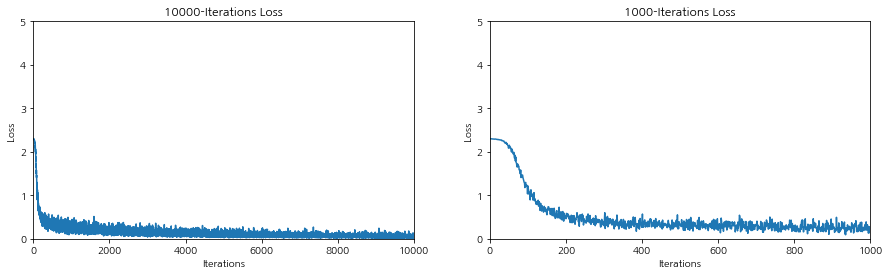

In [16]:
# 손실함수 변화 추이 그래프
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(15,4))
for iters_num, ax in zip([10000, 1000], axes):
    ax.plot(train_loss_list[:iters_num])
    ax.set_title("{}-Iterations Loss".format(iters_num))
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Loss")
    ax.set_ylim(0, 5)
    ax.set_xlim(0, iters_num)

(0, 18)

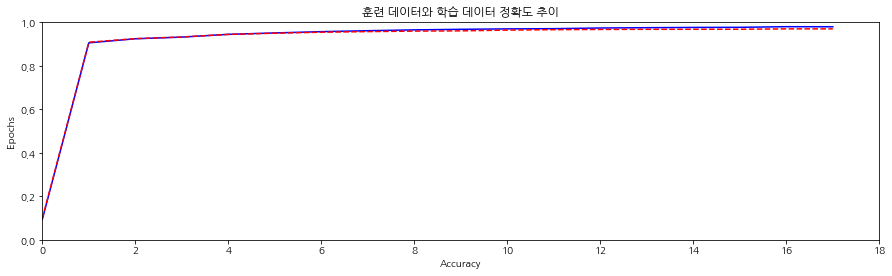

In [17]:
# 훈련 데이터와 시험 데이터에 대한 정확도 추이
fig, ax = plt.subplots(figsize=(15,4))

ax.plot(train_acc_list, c="b")
ax.plot(test_acc_list, "--", c="r")     # 시험 데이터에 대한 정확도는 점선으로 표시(Red 색상)
ax.set_title("훈련 데이터와 학습 데이터 정확도 추이")
ax.set_xlabel("Accuracy")
ax.set_ylabel("Epochs")
ax.set_ylim(0.0, 1.0)
ax.set_xlim(0, len(train_acc_list))